# Sesion 18 - Actividad - Grafica por categoria

## Actividad Básica

* Crea / Presenta un algoritmo que genere los datos de "reading_score" y "math_score", en variables categóricas, y guárdalo en dos columnas diferentes (cada columna nueva representa la nueva columna con variables categórica).

* Crea / Presenta una gráfica que condense la información obtenida ahora categóricamente.
 

### Librerias y Dataset

In [1]:
# Librerias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# Dataset
df = pd.read_csv('clean_students_complete.csv')
df.head()

,Unnamed: 0,Student ID,student_name,gender,grade,school_name,reading_score,math_score
0,0,0,Paul Bradley,M,9th,Huang High School,66,79
1,1,1,Victor Smith,M,12th,Huang High School,94,61
2,2,2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,3,3,Richard Scott,M,12th,Huang High School,67,58
4,4,4,Bonnie Ray,F,9th,Huang High School,97,84


### Preprocesamiento y Limpieza del dataset

In [17]:
# limpieza del dataset
df = df.drop('Unnamed: 0', axis=1)

In [18]:
# Se elimina la columna que no se va a utilizar
df = df.set_index('Student ID')
df.head()

,student_name,gender,grade,school_name,reading_score,math_score
Student ID,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79
1,Victor Smith,M,12th,Huang High School,94,61
2,Kevin Rodriguez,M,12th,Huang High School,90,60
3,Richard Scott,M,12th,Huang High School,67,58
4,Bonnie Ray,F,9th,Huang High School,97,84


In [19]:
# Se crean las 2 columnas categoricas basadas en los score
df['cat_read'] = pd.cut(df.reading_score, bins=[0,70,float('inf')], labels=['reprobado', 'aprobado'])
df['cat_math'] = pd.cut(df.math_score,    bins=[0,70,float('inf')], labels=['reprobado', 'aprobado'])
df.head()

,student_name,gender,grade,school_name,reading_score,math_score,cat_read,cat_math
Student ID,,,,,,,,
0,Paul Bradley,M,9th,Huang High School,66,79,reprobado,aprobado
1,Victor Smith,M,12th,Huang High School,94,61,aprobado,reprobado
2,Kevin Rodriguez,M,12th,Huang High School,90,60,aprobado,reprobado
3,Richard Scott,M,12th,Huang High School,67,58,reprobado,reprobado
4,Bonnie Ray,F,9th,Huang High School,97,84,aprobado,aprobado


### Se preparan los datos para graficar

In [20]:
# Se eliminan las columnas que no se necesitan 
df_categoricas = df.drop(['student_name', 'gender',  'grade', 'reading_score', 'math_score'], axis=1)
df_categoricas.head()

,school_name,cat_read,cat_math
Student ID,,,
0,Huang High School,reprobado,aprobado
1,Huang High School,aprobado,reprobado
2,Huang High School,aprobado,reprobado
3,Huang High School,reprobado,reprobado
4,Huang High School,aprobado,aprobado


In [21]:
# Se crean los dummies para graficarlos por escuela
df_dummies = pd.get_dummies(df_categoricas[['cat_read', 'cat_math']])
df_dummies.head()

,cat_read_reprobado,cat_read_aprobado,cat_math_reprobado,cat_math_aprobado
Student ID,,,,
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,1,0,1,0
4,0,1,0,1


In [22]:
# Se concatenan los dataframes
df_concatenado = pd.concat([df_categoricas, df_dummies], axis=1)
df_concatenado.head()

,school_name,cat_read,cat_math,cat_read_reprobado,cat_read_aprobado,cat_math_reprobado,cat_math_aprobado
Student ID,,,,,,,
0,Huang High School,reprobado,aprobado,1,0,0,1
1,Huang High School,aprobado,reprobado,0,1,1,0
2,Huang High School,aprobado,reprobado,0,1,1,0
3,Huang High School,reprobado,reprobado,1,0,1,0
4,Huang High School,aprobado,aprobado,0,1,0,1


In [25]:
# se eliminan las columnas que no se necesitan
df_concatenado = df_concatenado.drop(['cat_read', 'cat_math'], axis=1)
df_concatenado.head()

,school_name,cat_read_reprobado,cat_read_aprobado,cat_math_reprobado,cat_math_aprobado
Student ID,,,,,
0,Huang High School,1,0,0,1
1,Huang High School,0,1,1,0
2,Huang High School,0,1,1,0
3,Huang High School,1,0,1,0
4,Huang High School,0,1,0,1


In [26]:
# Se agrupan los registros por escuela
df_agrupado = df_concatenado.groupby('school_name').sum()
df_agrupado

,cat_read_reprobado,cat_read_aprobado,cat_math_reprobado,cat_math_aprobado
school_name,,,,
Bailey High School,1030.0,3946.0,1760.0,3216.0
Cabrera High School,114.0,1744.0,194.0,1664.0
Figueroa High School,636.0,2313.0,1069.0,1880.0
Ford High School,616.0,2123.0,938.0,1801.0
Griffin High School,97.0,1371.0,151.0,1317.0
Hernandez High School,1011.0,3624.0,1634.0,3001.0
Holden High School,31.0,396.0,40.0,387.0
Huang High School,618.0,2299.0,1070.0,1847.0
Johnson High School,1034.0,3727.0,1721.0,3040.0


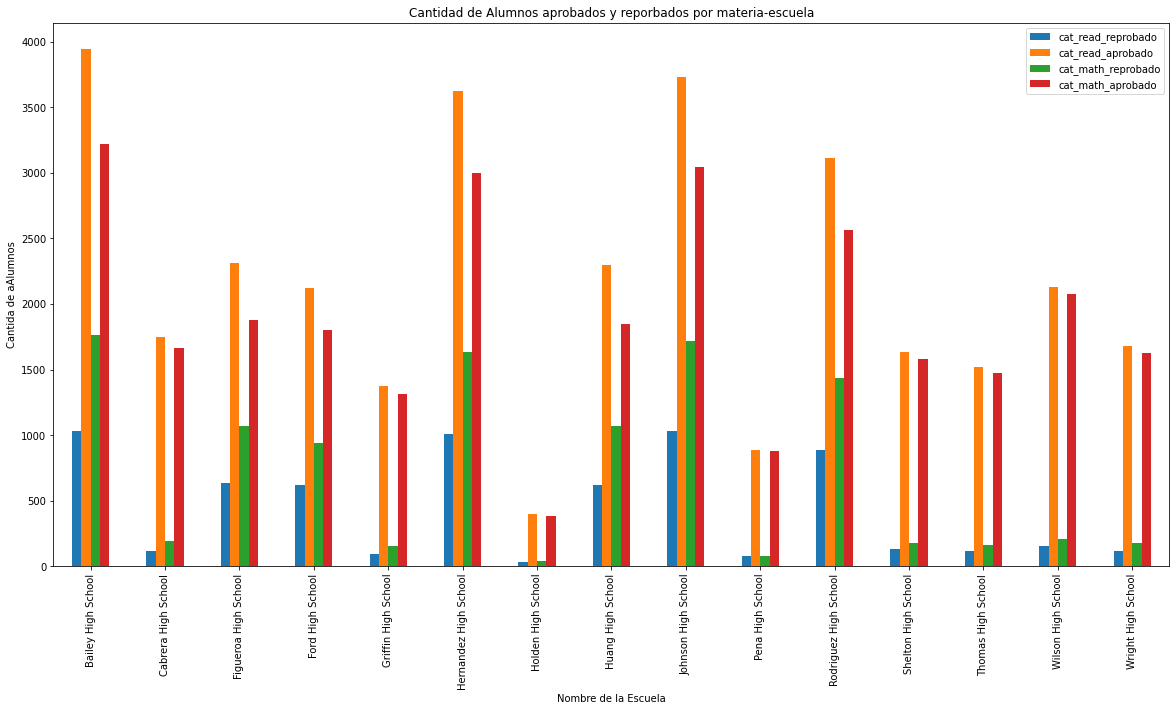

In [29]:
# Se grafica la informacion
df_agrupado.plot.bar(figsize=(20,10))
plt.title('Cantidad de Alumnos aprobados y reporbados por materia-escuela')
plt.xlabel('Nombre de la Escuela')
plt.ylabel('Cantida de aAlumnos');

# Actividad Avanzada

* Crea / Presenta un algoritmo que genere los datos de "reading_score" y "math_score", en variables categóricas, y guárdalo en dos columnas diferentes (cada columna nueva representa la nueva columna con variables categórica). 
 
* Crea / Presenta una gráfica que condense la información obtenida ahora categóricamente mostrando que género obtuvo mejor puntaje.